<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План работы над исследованием будет включать следующие этапы:
- Изучение состава данных и предобработка (типы данных, пропуски,  исключение ненужных параметров)
- Добавление в таблицу производных параметров (цена кв метра и проч.)
- Исследовательский анализ:
    - Исследование диапазонов значений различных параметров, медианных и выбивающихся значений
    - Исследование корреляций между ценой и параметрами квартир
    - Определение центра и исследование объявлений в центральной части города

## Изучение данных из файла

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='	')
data.info()
display(data.describe().T)
display(data.sample(10, random_state=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,count,mean,std,min,25%,50%,75%,max
total_images,"23,699.00",9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,"23,699.00","6,541,548.77","10,887,013.27","12,190.00","3,400,000.00","4,650,000.00","6,800,000.00","763,000,000.00"
total_area,"23,699.00",60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,"23,699.00",2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"14,504.00",2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,"23,613.00",10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,"21,796.00",34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,"23,699.00",5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,"21,421.00",10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,"12,180.00",1.15,1.07,0.00,0.00,1.00,2.00,5.00


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17338,5,"3,300,000.00",47.00,2018-03-30T00:00:00,1,3.00,10.00,nan,4,NaN,...,nan,nan,деревня Новое Девяткино,nan,nan,nan,nan,nan,nan,42.00
13876,12,"2,290,000.00",40.00,2016-01-17T00:00:00,2,3.00,3.00,27.00,2,False,...,7.40,nan,Гатчина,nan,nan,nan,nan,nan,nan,895.00
3586,0,"5,450,000.00",53.80,2018-02-01T00:00:00,2,2.85,2.00,36.50,2,NaN,...,5.30,1.00,Санкт-Петербург,"38,914.00","10,617.00",1.00,255.00,0.00,nan,64.00
6495,1,"5,482,990.00",66.10,2016-02-19T00:00:00,2,nan,25.00,43.60,1,NaN,...,11.10,0.00,поселок Бугры,nan,nan,nan,nan,nan,nan,469.00
14431,5,"4,190,000.00",54.00,2017-10-30T00:00:00,2,3.00,12.00,34.00,3,NaN,...,9.00,2.00,Гатчина,nan,nan,nan,nan,nan,nan,73.00
8363,13,"5,690,000.00",41.70,2016-12-29T00:00:00,2,3.20,5.00,23.00,2,NaN,...,7.50,0.00,Санкт-Петербург,"23,963.00","3,530.00",2.00,352.00,3.00,341.00,283.00
15270,15,"4,999,000.00",42.00,2018-11-23T00:00:00,1,2.80,17.00,22.00,4,NaN,...,11.00,2.00,Санкт-Петербург,"30,571.00","11,470.00",1.00,721.00,0.00,nan,60.00
2143,4,"3,350,000.00",55.50,2017-11-14T00:00:00,2,nan,5.00,33.50,3,NaN,...,8.50,2.00,Гатчина,nan,nan,nan,nan,nan,nan,211.00
11284,17,"3,200,000.00",48.00,2017-10-25T00:00:00,1,2.80,9.00,19.00,4,NaN,...,11.50,2.00,Всеволожск,nan,nan,nan,nan,nan,nan,246.00
17095,8,"5,100,000.00",50.20,2018-10-06T00:00:00,2,2.50,3.00,28.00,1,NaN,...,5.40,nan,Пушкин,"12,671.00","24,825.00",1.00,171.00,0.00,nan,23.00


### Вывод

В таблице 23699 записей. Есть значительное число колонок, где не все строки заполнены, включая как вписанные пользователями (высота потолков, кол-во балконов, жилая площать), так и полученные автоматически (расстояние до аэропорта, центра, длительность размещения объявления и др).
Ряд колонок, таких как: число фоторафий, признак апартаментов и студии, наличие свободной планировки не требуются нам для ответов на поставленные вопросы, согласно условиям задачи. Такие колонки можно удалить.
Большую часть числовых параметров можно привести к меньшей разрядности для экономии места. Также колонка с датой имеет строковый тип.

## Предобработка данных

In [3]:
#Исследование значений в колонках

#display(data.is_apartment.value_counts())
#display(data.total_images.value_counts())
#display(data.open_plan.value_counts())
#display(data.last_price.value_counts())
#display(data.airports_nearest.value_counts())
#display(data.parks_around3000.value_counts())
#display(data[data.floors_total.isna()])
#display(data.balcony.value_counts())
#display(data[data.balcony.isna()])

#Исследуем пропуски в растоянии до центра и возможность их заполнения по соседним данным

#Получим список населенных пунктов, встречающихся в строках с пустым расстоянием до центра СПБ
localities = data.loc[(data.cityCenters_nearest.isna()) & (data.airports_nearest.isna()), 'locality_name'].unique()
#display(localities)
#Построим таблицу с расчетом среднего расстояния до центра у квартир с группировкой по населенному пункту, кроме СПБ
cityCenter_distance = data.query('locality_name not in ("Санкт-Петербург")').pivot_table(index='locality_name', values='cityCenters_nearest')
#display(cityCenter_distance.sample(20))
#По этим пунктам мы можем расчитать среднее и заполнить у отсутствующих запией:
display(cityCenter_distance.query('locality_name in @localities')) 
localities2fill = cityCenter_distance.query('locality_name in @localities').index
#Посмотрим, сколько записей мы сможем таким образом заполнить
display(data.query('cityCenters_nearest.isna() and airports_nearest.isna() and locality_name in @localities2fill and locality_name not in ("Санкт-Петербург")'))

#Исследуем пропуски в жилой площади
print('Пропуски в жилой площади:')
data.query('living_area.isna()').count()

#display(data.cityCenters_nearest.value_counts())
#display(data[data['cityCenters_nearest'] ==0])
#display(data[data['ponds_nearest'] ==0])
#display(data[data['parks_nearest'] ==0])
#display(data[data['airports_nearest'] ==0])
#display(data.query('last_price<0'))

,cityCenters_nearest
locality_name,
Колпино,"32,113.77"
Красное Село,"30,020.28"
Кронштадт,"49,195.73"
Ломоносов,"50,739.97"
поселок Мурино,"21,888.00"
посёлок Шушары,"24,243.39"
посёлок Щеглово,"34,085.00"


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
66,6,"3,450,000.00",34.00,2015-12-16T00:00:00,1,2.60,17.00,17.40,8,False,...,11.50,2.00,поселок Мурино,nan,nan,nan,nan,nan,nan,186.00
608,2,"1,850,000.00",25.00,2019-02-20T00:00:00,0,nan,10.00,nan,7,NaN,...,nan,nan,посёлок Шушары,nan,nan,nan,nan,nan,nan,29.00
1467,1,"4,148,000.00",66.91,2016-06-27T00:00:00,2,2.60,14.00,36.27,1,False,...,11.24,1.00,поселок Мурино,nan,nan,nan,nan,nan,nan,58.00
2026,9,"2,310,000.00",33.69,2016-04-15T00:00:00,1,2.63,27.00,15.32,26,False,...,9.39,2.00,поселок Мурино,nan,nan,nan,nan,nan,nan,87.00
2294,11,"1,400,000.00",30.90,2018-02-14T00:00:00,1,2.50,5.00,17.40,4,NaN,...,5.20,1.00,посёлок Щеглово,nan,nan,nan,nan,nan,nan,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21935,6,"2,500,000.00",25.00,2016-05-10T00:00:00,1,nan,24.00,17.00,8,NaN,...,5.00,1.00,поселок Мурино,nan,nan,nan,nan,nan,nan,63.00
22298,4,"4,400,000.00",59.00,2016-02-07T00:00:00,2,nan,24.00,31.00,20,NaN,...,13.00,0.00,поселок Мурино,nan,nan,nan,nan,nan,nan,199.00
22652,5,"2,650,000.00",26.00,2015-06-24T00:00:00,1,nan,14.00,15.00,11,False,...,nan,0.00,поселок Мурино,nan,nan,nan,nan,nan,nan,373.00
23022,7,"3,280,000.00",58.00,2017-05-17T00:00:00,2,nan,5.00,31.40,2,NaN,...,nan,0.00,посёлок Щеглово,nan,nan,nan,nan,nan,nan,53.00


Пропуски в жилой площади:


total_images            1903
last_price              1903
total_area              1903
first_day_exposition    1903
rooms                   1903
ceiling_height           797
floors_total            1870
living_area                0
floor                   1903
is_apartment             120
studio                  1903
open_plan               1903
kitchen_area             439
balcony                  498
locality_name           1898
airports_nearest        1278
cityCenters_nearest     1280
parks_around3000        1280
parks_nearest            577
ponds_around3000        1280
ponds_nearest            695
days_exposition         1705
dtype: int64

In [4]:
#Заполнение пустых значений кол-ва балконов
data.balcony = data.balcony.fillna(0)

#Заполним пустые расстояния до центра средними расстояниями для тех же населенных пунктов, кроме СПБ, расчитанными выше
data = data.join(cityCenter_distance, on='locality_name', rsuffix='_y')
data['cityCenters_nearest'] = data['cityCenters_nearest'].where(~data.cityCenters_nearest.isna(), data['cityCenters_nearest_y'])

#Удаление ненужных и временных полей
drop_columns = ['is_apartment', 'total_images', 'parks_nearest', 'ponds_nearest', 'parks_around3000', 'ponds_around3000', 'cityCenters_nearest_y'] 
try:
    data.drop(drop_columns, axis=1, inplace=True)
except:
    print('***Колонки уже удалены***')
    print('')

#Приведение типов
data.first_day_exposition = pd.to_datetime(data.first_day_exposition, format='%Y-%m-%d')
data.last_price = data.last_price.astype('int32')
data.rooms = data.rooms.astype('int8')
data.floors_total = data.floors_total.astype('Int8')
data.floor = data.floor.astype('int8')
data.total_area = data.total_area.astype('float32')
data.ceiling_height = data.ceiling_height.astype('float32')
data.kitchen_area = data.kitchen_area.astype('float32')
data.living_area = data.living_area.astype('float32')
data.cityCenters_nearest = data.cityCenters_nearest.astype('float32')
#data.cityCenters_nearest = data.cityCenters_nearest.astype('Int32')
data.days_exposition = np.floor(pd.to_numeric(data.days_exposition, errors='coerce')).astype('Int32')
data.balcony = data.balcony.astype('int8')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 16 columns):
last_price              23699 non-null int32
total_area              23699 non-null float32
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int8
ceiling_height          14504 non-null float32
floors_total            23613 non-null Int8
living_area             21796 non-null float32
floor                   23699 non-null int8
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float32
balcony                 23699 non-null int8
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18244 non-null float32
days_exposition         20518 non-null Int32
dtypes: Int32(1), Int8(1), bool(2), datetime64[ns](1), float32(5), float64(1), int32(1), int8(3), object(1)
memory usage: 1.4+ MB


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> 
    
Рекомендую работать со всеми колонками, так как это учебный проект. Например, с колонками, связанными с расстояниями до аэропортов и т.д. есть взаимосвязи и ими можно пользоваться. С преобрзованиями типов согласен.
</div>

**Вывод**

- Некоторые колонки нам пока не требуются по условиям задачи (кол-во фотографий, признак апартаментов - этот параметр проставлен у менее 10% данных, при этом True  всего у 50 строк, признак студии, свободной планировки (хотя в целом мы могли бы исследовать его влияние на цену), расстояние и кол-во прудов и парков). Удалим их на этом этапе из таблицы как не интересующие нас в рамках исследования.
- В целом пустые параметры не имеет смысла заполнять нулями, но условно можно заполнить пустые значения числа балконов, если считать, что там где не указаны, их нет. Большинство же параметров к нулю лучше не приводить, тк это может вносить искажения при исследовании, построении гистограмм и диаграмм разброса.
- У 23% записей не проставлено расстояние до центра города. У них же не указано расстояние и до аэропорта и других объектов. Если посмотреть на населенные пункты этих квартир, то это в основном сильно удаленные от центра Петербурга небольшие деревни и города. В целом, эти пропуски можно заполнить, взяв открытые данные по геолокации - расстоянию от центров этих населенных пунктов до центра Петербурга. Используя только данные таблицы и посчитав среднее расстояние по квартирам из тех же населенных пунктов, где расстояние до центра заполнено, удалось заполнить только 64 пропуска.
- Пропуски в жилой и кухонной площади можно заполнить медианными значениями по числу комнат, хотя это и не будет полезным по существу. Заполнение сделано в следующей главе ниже, после расчета отношений.
- Пропуски в высоте потолков можно заполнить медианным значением. Также сделано в следующей главе ниже.
- Тип даты объявления изменен на datetime.
- Для экономии памяти большая часть параметров приведена либо к float меньшей разрядности либо к целочисленному типу. Часть параметров не удалось привести к целочисленному типу, тк в них есть пустые значения, а параметр Int% (с заглавной), который должен поддержать NaNы, не поддерживается, как оказалось, в corr().


## Расчёты и добавление результатов в таблицу

In [5]:
data['price_sqm'] = (data['last_price'] / data['total_area']).astype('float32')
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

def floor_type(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
data['floor_type'] = data.apply(floor_type, axis=1)

data['living_ratio'] = data['living_area']/data['total_area']
data['kitchen_ratio'] = data['kitchen_area']/data['total_area']

display(data.sample(10, random_state=1))
display(data.info())


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,airports_nearest,cityCenters_nearest,days_exposition,price_sqm,weekday,month,year,floor_type,living_ratio,kitchen_ratio
17338,3300000,47.00,2018-03-30,1,3.00,10,nan,4,False,False,...,nan,nan,42,"70,212.77",4,3,2018,Другой,nan,nan
13876,2290000,40.00,2016-01-17,2,3.00,3,27.00,2,False,False,...,nan,nan,895,"57,250.00",6,1,2016,Другой,0.68,0.19
3586,5450000,53.80,2018-02-01,2,2.85,2,36.50,2,False,False,...,"38,914.00","10,617.00",64,"101,301.12",3,2,2018,Последний,0.68,0.10
6495,5482990,66.10,2016-02-19,2,nan,25,43.60,1,False,False,...,nan,nan,469,"82,949.93",4,2,2016,Первый,0.66,0.17
14431,4190000,54.00,2017-10-30,2,3.00,12,34.00,3,False,False,...,nan,nan,73,"77,592.59",0,10,2017,Другой,0.63,0.17
8363,5690000,41.70,2016-12-29,2,3.20,5,23.00,2,False,False,...,"23,963.00","3,530.00",283,"136,450.84",3,12,2016,Другой,0.55,0.18
15270,4999000,42.00,2018-11-23,1,2.80,17,22.00,4,False,False,...,"30,571.00","11,470.00",60,"119,023.81",4,11,2018,Другой,0.52,0.26
2143,3350000,55.50,2017-11-14,2,nan,5,33.50,3,False,False,...,nan,nan,211,"60,360.36",1,11,2017,Другой,0.60,0.15
11284,3200000,48.00,2017-10-25,1,2.80,9,19.00,4,False,False,...,nan,nan,246,"66,666.66",2,10,2017,Другой,0.40,0.24
17095,5100000,50.20,2018-10-06,2,2.50,3,28.00,1,False,False,...,"12,671.00","24,825.00",23,"101,593.62",5,10,2018,Первый,0.56,0.11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
last_price              23699 non-null int32
total_area              23699 non-null float32
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int8
ceiling_height          14504 non-null float32
floors_total            23613 non-null Int8
living_area             21796 non-null float32
floor                   23699 non-null int8
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float32
balcony                 23699 non-null int8
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18244 non-null float32
days_exposition         20518 non-null Int32
price_sqm               23699 non-null float32
weekday                 23699 non-null int64
month                   23699 non-null int64
year              

None

In [6]:
#Заполним пустые значения площадей и высоты потолков

#Расчитаем медианные отношения Жилая пл/Общая пл и Пл Кухни/Общая пл с группировкой по кол-ву комнат
area_ratio = data.pivot_table(index='rooms', values = ['living_ratio','kitchen_ratio'], aggfunc='median')
display(area_ratio)
#Посчитаем медианное значение высоты потолков
ceiling_height_median = data['ceiling_height'].median()
#Заполним пустые значения жилой и кухонной площади в данных
data = data.join(area_ratio, on='rooms', rsuffix='_y')
data['living_area'] = data['living_area'].where(~data.living_area.isna(), data['living_ratio_y']*data['total_area'])
data['kitchen_area'] = data['kitchen_area'].where(~data.kitchen_area.isna(), data['kitchen_ratio_y']*data['total_area'])
data['living_ratio'] = data['living_ratio'].where(~data.living_ratio.isna(), data['living_ratio_y'])
data['kitchen_ratio'] = data['kitchen_ratio'].where(~data.kitchen_ratio.isna(), data['kitchen_ratio_y'])
#Удалим временные колонки
data.drop(columns=['living_ratio_y', 'kitchen_ratio_y'], axis=1, inplace=True)
#Заполним пустые значения высоты потолков
data['ceiling_height'] = data['ceiling_height'] = data['ceiling_height'].where(~data.ceiling_height.isna(), ceiling_height_median)

display(data.sample(10, random_state=1))
display(data.info())

,kitchen_ratio,living_ratio
rooms,,
0,nan,0.69
1,0.25,0.48
2,0.16,0.59
3,0.13,0.63
4,0.11,0.66
5,0.11,0.65
6,0.10,0.68
7,0.08,0.68
8,0.11,0.69


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,airports_nearest,cityCenters_nearest,days_exposition,price_sqm,weekday,month,year,floor_type,living_ratio,kitchen_ratio
17338,3300000,47.00,2018-03-30,1,3.00,10,22.68,4,False,False,...,nan,nan,42,"70,212.77",4,3,2018,Другой,0.48,0.25
13876,2290000,40.00,2016-01-17,2,3.00,3,27.00,2,False,False,...,nan,nan,895,"57,250.00",6,1,2016,Другой,0.68,0.19
3586,5450000,53.80,2018-02-01,2,2.85,2,36.50,2,False,False,...,"38,914.00","10,617.00",64,"101,301.12",3,2,2018,Последний,0.68,0.10
6495,5482990,66.10,2016-02-19,2,2.65,25,43.60,1,False,False,...,nan,nan,469,"82,949.93",4,2,2016,Первый,0.66,0.17
14431,4190000,54.00,2017-10-30,2,3.00,12,34.00,3,False,False,...,nan,nan,73,"77,592.59",0,10,2017,Другой,0.63,0.17
8363,5690000,41.70,2016-12-29,2,3.20,5,23.00,2,False,False,...,"23,963.00","3,530.00",283,"136,450.84",3,12,2016,Другой,0.55,0.18
15270,4999000,42.00,2018-11-23,1,2.80,17,22.00,4,False,False,...,"30,571.00","11,470.00",60,"119,023.81",4,11,2018,Другой,0.52,0.26
2143,3350000,55.50,2017-11-14,2,2.65,5,33.50,3,False,False,...,nan,nan,211,"60,360.36",1,11,2017,Другой,0.60,0.15
11284,3200000,48.00,2017-10-25,1,2.80,9,19.00,4,False,False,...,nan,nan,246,"66,666.66",2,10,2017,Другой,0.40,0.24
17095,5100000,50.20,2018-10-06,2,2.50,3,28.00,1,False,False,...,"12,671.00","24,825.00",23,"101,593.62",5,10,2018,Первый,0.56,0.11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
last_price              23699 non-null int32
total_area              23699 non-null float32
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int8
ceiling_height          23699 non-null float32
floors_total            23613 non-null Int8
living_area             23699 non-null float32
floor                   23699 non-null int8
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23502 non-null float32
balcony                 23699 non-null int8
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18244 non-null float32
days_exposition         20518 non-null Int32
price_sqm               23699 non-null float32
weekday                 23699 non-null int64
month                   23699 non-null int64
year              

None

## Исследовательский анализ данных

count   23,699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

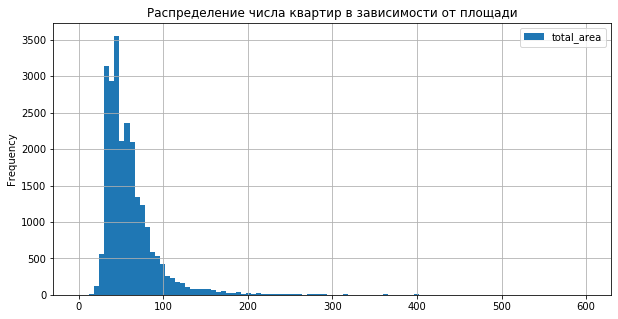

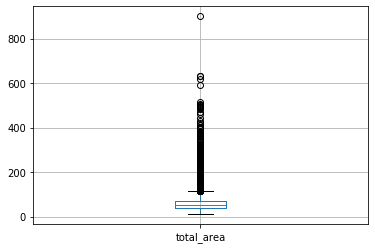

count        23,699.00
mean      6,541,548.77
std      10,887,013.27
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

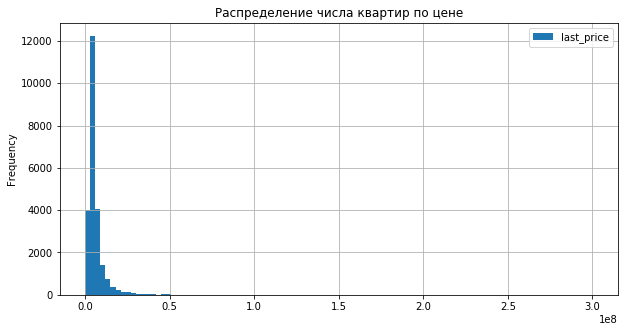

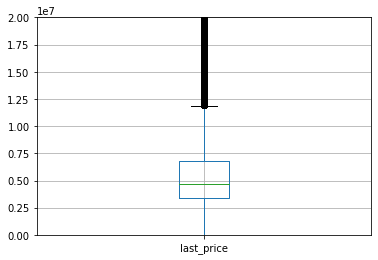

count   23,699.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

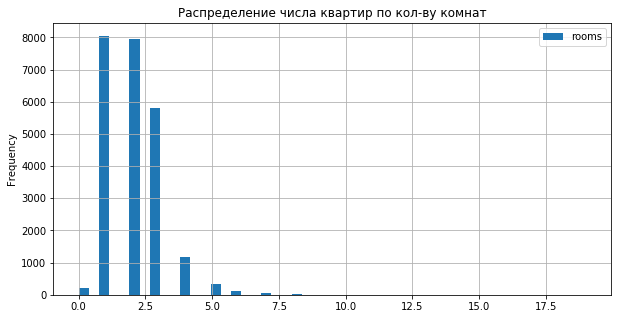

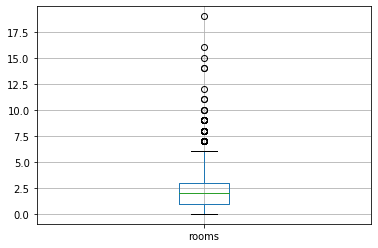

count   23,699.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

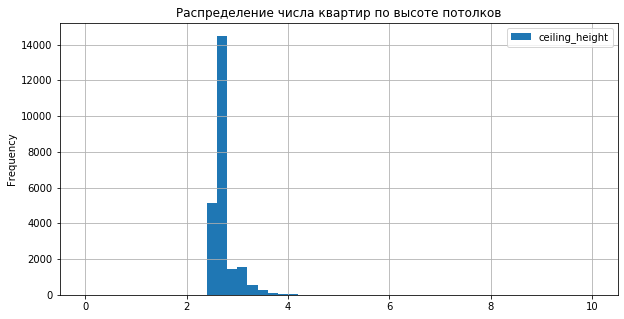

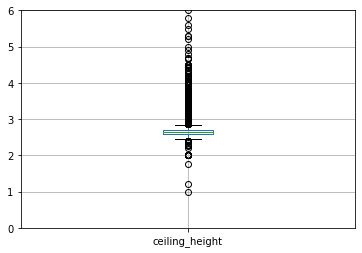

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

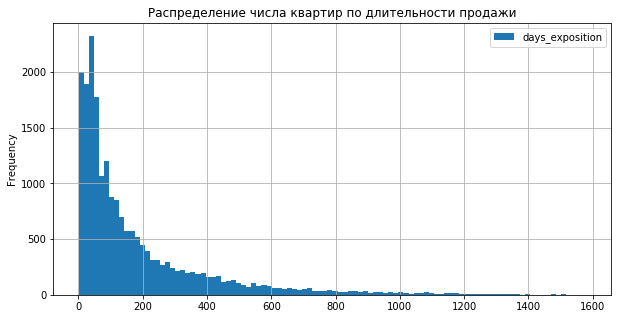

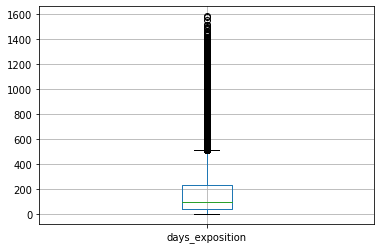

0.07380058230305077

In [7]:
#Общая площать
display(data['total_area'].describe())
data.plot(kind='hist', y='total_area', bins=100, range = (0,600), figsize = (10,5), grid=True, title = 'Распределение числа квартир в зависимости от площади')
plt.show()
data.boxplot(column='total_area')
plt.show()
#Цена
display(data['last_price'].describe())
data.plot(kind='hist', y='last_price', bins=100, range = (0, 300000000), figsize = (10,5), grid=True, title = 'Распределение числа квартир по цене')
plt.show()
ax=data.boxplot(column='last_price')
ax.set_ylim(0,20000000)
plt.show()
#Количество комнат
display(data['rooms'].describe())
data.plot(kind='hist', y='rooms', bins=50, figsize = (10,5), grid=True, title = 'Распределение числа квартир по кол-ву комнат')
plt.show()
data.boxplot(column='rooms')
plt.show()
#Высота потолков
display(data['ceiling_height'].describe())
data.plot(kind='hist', y='ceiling_height', bins=50, range = (0,10), figsize = (10,5), grid=True, title = 'Распределение числа квартир по высоте потолков')
plt.show()
ax=data.boxplot('ceiling_height')
ax.set_ylim(-0,6)
plt.show()

#Время продажи квартиры
display(data['days_exposition'].describe())
data.plot(kind='hist', y='days_exposition', bins=100, figsize = (10,5), grid=True, title = 'Распределение числа квартир по длительности продажи')
plt.show()
data.boxplot(column='days_exposition')
plt.show()
display(len(data.query('days_exposition > 500'))/len(data))

#display(data[data['days_exposition'] < 60].groupby('days_exposition')['days_exposition'].count())
#display(data.query('ceiling_height>10'))
#display(data.query('total_area ==900'))
#display(data.query('rooms==0'))

**Выводы по разбросу параметров**

Средняя квартира имеет площать 52кв.м, 2 комнаты, потолки 2.7м и цену в 6.5млн.
Есть отдельные выбивающиеся записи по площади: один объект в 900кв.м и цене: 763млн (причем это два разных объекта).
Нашлись 25 квартир с указанной высотой потолков >10 метров, среди который у одной указана высота в 100м, что похоже на некорректные данные.

Обычно продажа занимает около 3 месяцев (по медиане). 
Продажи длительностью > 500 дней можно считать необычно долгими, таких продаж примерно 7% от общего числа. 
Быстрые продажи - это менее 45 дней.


In [8]:
#Уберем редкие и выбивающиеся значения
data = data.query('last_price < 600000000 and total_area < 400 and not(ceiling_height > 20)')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23651 entries, 0 to 23698
Data columns (total 23 columns):
last_price              23651 non-null int32
total_area              23651 non-null float32
first_day_exposition    23651 non-null datetime64[ns]
rooms                   23651 non-null int8
ceiling_height          23651 non-null float32
floors_total            23565 non-null Int8
living_area             23651 non-null float32
floor                   23651 non-null int8
studio                  23651 non-null bool
open_plan               23651 non-null bool
kitchen_area            23455 non-null float32
balcony                 23651 non-null int8
locality_name           23602 non-null object
airports_nearest        18121 non-null float64
cityCenters_nearest     18206 non-null float32
days_exposition         20482 non-null Int32
price_sqm               23651 non-null float32
weekday                 23651 non-null int64
month                   23651 non-null int64
year              

None

Мы избавились от сильно выбивающихся записей:
- Отсеили объекты >=400 кв.м и ценой >=600млн: они считаются выбивающимся из общего диапазона. Это уникальные лоты, и параметры и ценообразование у них может не подчиняться общим закономерностям, при этом они могут вносить искажения при исследовании. Точка отсева выбрана по гистограммам (таких объектов очень мало). 
- Отсеили записи с некорректной высотой потолков

'Корреляция стоимости и площади:'

0.687926798110227

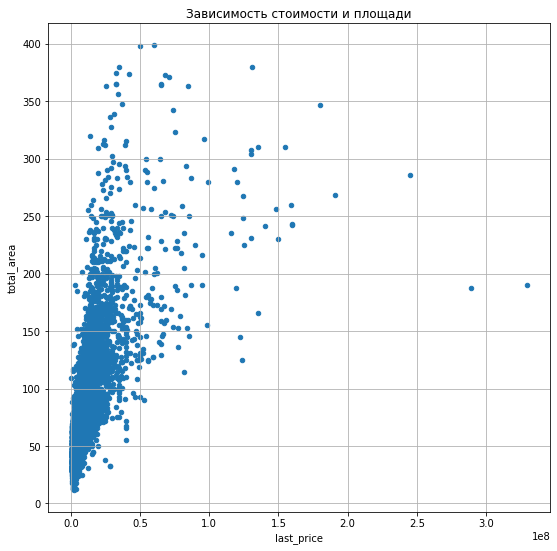

'Корреляция стоимости и кол-ва комнат:'

0.4009309500929074

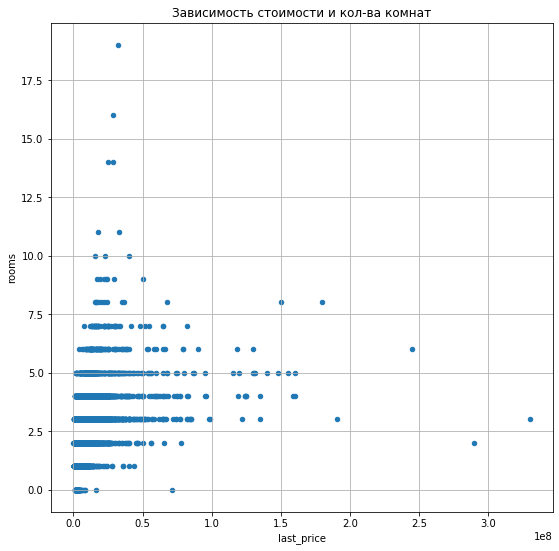

'Корреляция площади и кол-ва комнат:'

0.7798201969765455

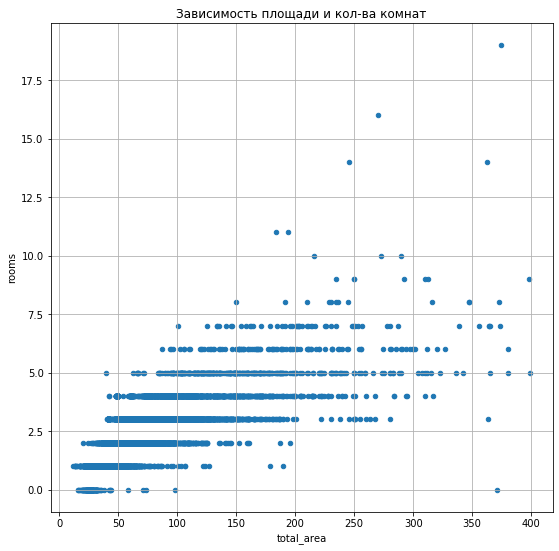

'Корреляция жилой площади и кол-ва комнат:'

0.8456880109417582

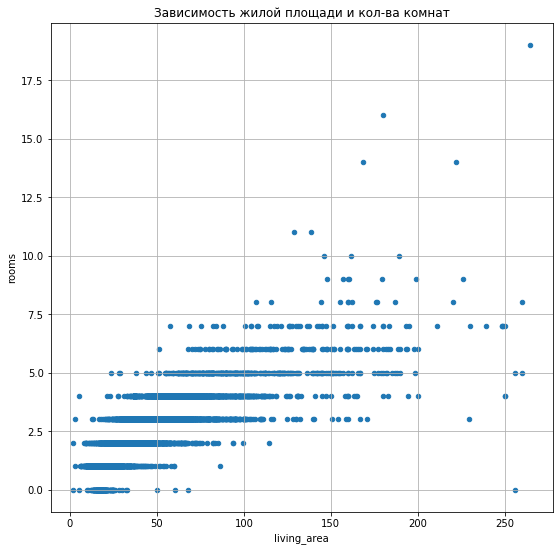

'Корреляция отношения жилой к общей площади и кол-ва комнат:'

0.504268133468666

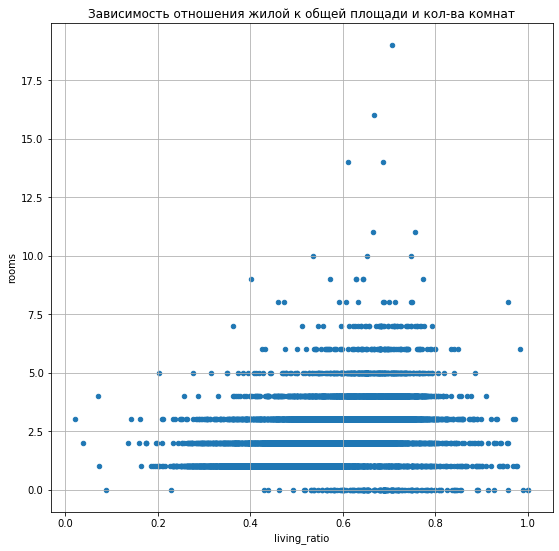

'Корреляция стоимости и расстояния до центра:'

-0.2559518723243901

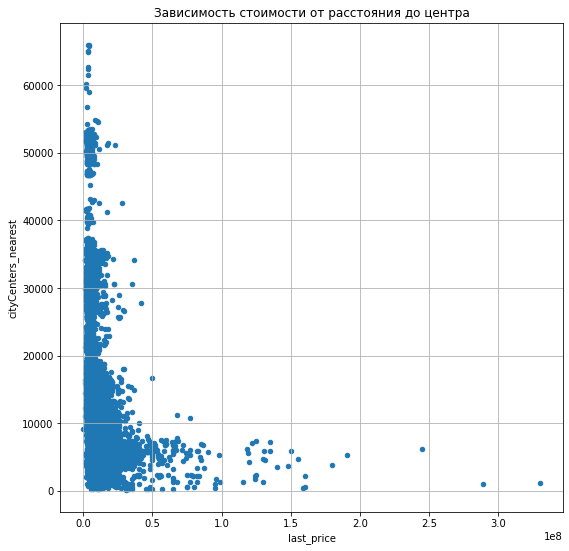

'Корреляция стоимости и дня недели размещения:'

-0.005130954408199694

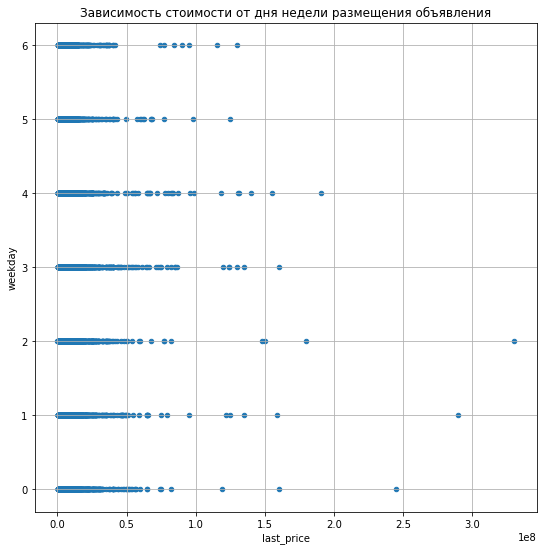

'Корреляция стоимости и месяца размещения:'

0.0014493796331695047

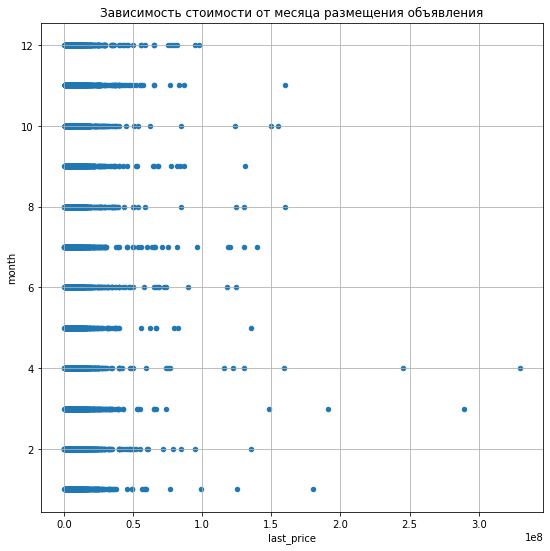

'Корреляция стоимости и года размещения:'

-0.05227208319186029

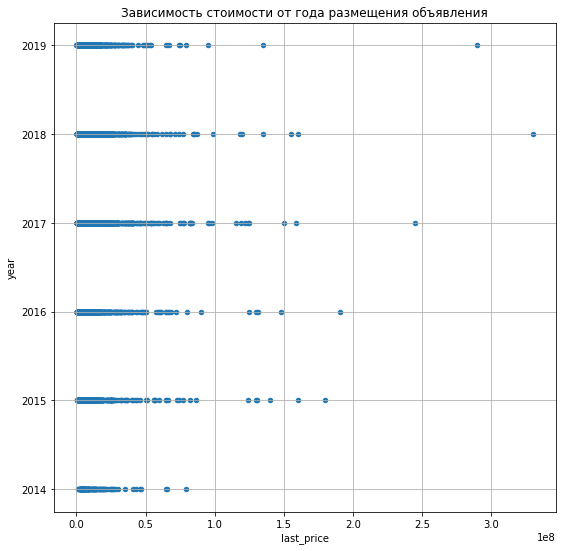

Зависимость стоимости от этажа:


,last_price
floor_type,
Другой,4850000
Первый,3900000
Последний,4300000


In [9]:
#Посчитаем коэффициенты и построим диаграммы корреляции
#Зависимость стоимости от площади
display("Корреляция стоимости и площади:", data.last_price.corr(data.total_area))
data.plot(kind='scatter', x='last_price', y='total_area', grid=True, figsize=(9,9), title = 'Зависимость стоимости и площади')
plt.show()

#Зависимость стоимости от кол-ва комнат
display("Корреляция стоимости и кол-ва комнат:", data.last_price.corr(data.rooms))
data.plot(kind='scatter', x='last_price', y='rooms', grid=True, figsize=(9,9), title = 'Зависимость стоимости и кол-ва комнат')
plt.show()

#Зависимость площади от кол-ва комнат
display("Корреляция площади и кол-ва комнат:", data.total_area.corr(data.rooms))
data.plot(kind='scatter', x='total_area', y='rooms', grid=True, figsize = (9,9), title = 'Зависимость площади и кол-ва комнат')
plt.show()

#Зависимость жилой площади от кол-ва комнат
display("Корреляция жилой площади и кол-ва комнат:", data.living_area.corr(data.rooms))
data.plot(kind='scatter', x='living_area', y='rooms', grid=True, figsize = (9,9), title = 'Зависимость жилой площади и кол-ва комнат')
plt.show()

#Зависимость living ratio от кол-ва комнат
display("Корреляция отношения жилой к общей площади и кол-ва комнат:", data.living_ratio.corr(data.rooms))
data.plot(kind='scatter', x='living_ratio', y='rooms', grid=True, figsize = (9,9), title = 'Зависимость отношения жилой к общей площади и кол-ва комнат')
plt.show()


#Зависимость стоимости от расстояния до центра
display("Корреляция стоимости и расстояния до центра:", data.last_price.corr(data.cityCenters_nearest))
data.plot(kind='scatter', x='last_price', y='cityCenters_nearest', grid=True, figsize=(9,9), title = 'Зависимость стоимости от расстояния до центра')
plt.show()

#Зависимость стоимости от даты размещения
display("Корреляция стоимости и дня недели размещения:", data.last_price.corr(data.weekday))
data.plot(kind='scatter', x='last_price', y='weekday', grid=True, figsize=(9,9), title = 'Зависимость стоимости от дня недели размещения объявления')
plt.show()

display("Корреляция стоимости и месяца размещения:", data.last_price.corr(data.month))
data.plot(kind='scatter', x='last_price', y='month', grid=True, figsize=(9,9), title = 'Зависимость стоимости от месяца размещения объявления')
plt.show()

display("Корреляция стоимости и года размещения:", data.last_price.corr(data.year))
data.plot(kind='scatter', x='last_price', y='year', grid=True, figsize=(9,9), title = 'Зависимость стоимости от года размещения объявления')
plt.show()

#Зависимость стоимости от этажа
print('Зависимость стоимости от этажа:')
display(data.pivot_table(index='floor_type', values='last_price', aggfunc='median'))


**Влияние параметров на стоимость квартиры**

Существует высокая корреляция между площадью и стоимостью квартиры. При этом видно, что корреляция снижается при увеличении площади: до 100кв.м можно говорить об очень высокой зависимости, далее разброс цен при равной площади существенное увеличивается.

Зависимость стоимости от количеста комнат уже значительно ниже. Это можно объяснить тем, что корреляция кол-ва комнат и общей площади сама по себе высокая, но далека от 1. То есть при равном количестве комнат, площать разница. Другой фактор - это, судя по всему, наличие большого ошибок в параметре rooms (см диаграмму разброса числа комнат и площади): например нулевых значений, записей, где указана 1 комната при площади >100квм.

Есть обратная корреляция расстояния до центра города и цены, но довольно слабая. Тем не менее, можно заметить как разброс цен повышается при уменьшении радиуса до центра, резко увеличиваясь при расстоянии < 10км.

Существует зависимость стоимости от этажа: в среднем квартиры на 1х этажах оцениваются примерно на 10% дешевле чем на последних, а те в свою очередь на столько же дешевле чем на остальных этажах.

Не обнаружено корреляции между ценой объекта и годом, месяцем или днем размещения на продажу.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 
    
Желательно предобработать данные прежде чем анализировать зависимости. Чтение графиков так же корректно, кф корреляции посчитаны верно.
</div>

In [10]:
#Найдем топ 10 населенных пунктов по числу объявлений
top_localities = data.pivot_table(index='locality_name', values='price_sqm', aggfunc=('count', 'median')).sort_values(by='count', ascending=False)
top_localities.columns=['count', 'price_sqm']
top_localities.head(10)

,count,price_sqm
locality_name,,
Санкт-Петербург,15683,"104,761.91"
посёлок Мурино,520,"85,878.47"
посёлок Шушары,440,"76,876.17"
Всеволожск,398,"65,789.48"
Пушкин,369,"100,000.00"
Колпино,338,"74,723.75"
посёлок Парголово,327,"91,642.86"
Гатчина,306,"67,860.57"
деревня Кудрово,299,"91,860.47"


**Рейтинг населенных пунктов**

Среди населенных пунктов, по которым есть больше всего данных о продажах, чемпионами по цене за кв.м являются Санкт-Петербург, Пушкин, Парголово и Кудрово. 
Дешевле всего жилье в Выборге, Всеволожске и Гатчине.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,last_price
cityCenter_km,
0.00,"31,449,115.85"
1.00,"21,056,232.46"
2.00,"16,438,568.44"
3.00,"10,914,664.80"
4.00,"12,168,387.32"
5.00,"13,194,947.67"
6.00,"14,759,882.02"
7.00,"14,707,347.87"
8.00,"9,278,510.87"


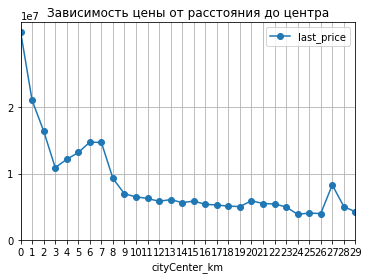

In [11]:
#Выделим квартиры в Спб и добавим колонку с расстоянием до центра в км
data_spb = data[data['locality_name'] == "Санкт-Петербург"]
data_spb['cityCenter_km'] = (data_spb['cityCenters_nearest']/1000).round(0)
#display(data_spb[['cityCenters_nearest', 'cityCenter_km']].sample(20))

#Сгруппируем данные по км
spb_km = data_spb.pivot_table(index='cityCenter_km', values='last_price').sort_values(by='cityCenter_km', ascending=True)
display(spb_km.head(10))
ax = spb_km.plot(style='o-', grid=True, title = 'Зависимость цены от расстояния до центра')
plt.xticks(np.arange(0, 30, step=1))
plt.yticks(np.arange(0, 30000000, step=10000000))
plt.show()


**Определение центральной зоны**

На основании локального максимума на графике, центр Санкт-Петербурга можно обозначить как зону с радиусом 6км от центра.

count   3,502.00
mean       90.82
std        50.91
min        12.00
25%        56.80
50%        78.12
75%       109.28
max       399.00
Name: total_area, dtype: float64

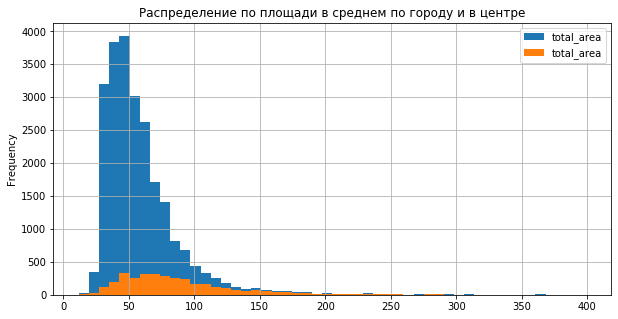

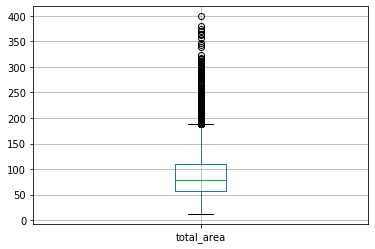

count         3,502.00
mean     14,077,653.62
std      17,787,759.13
min       1,600,000.00
25%       6,650,000.00
50%       9,150,000.00
75%      14,200,000.00
max     330,000,000.00
Name: last_price, dtype: float64

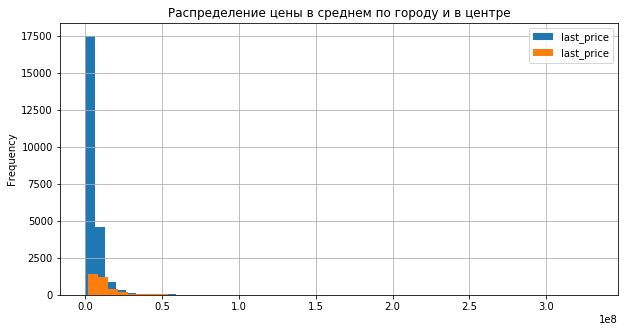

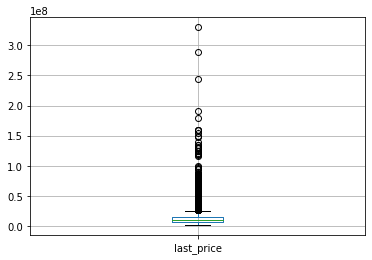

count   3,502.00
mean        2.81
std         1.41
min         0.00
25%         2.00
50%         3.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

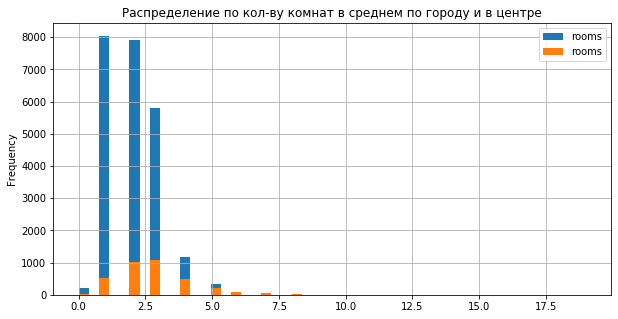

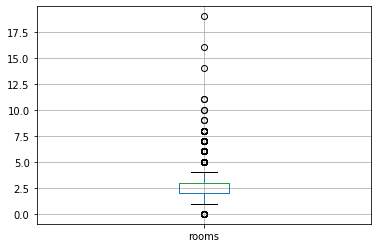

count   3,502.00
mean        2.94
std         0.37
min         2.40
25%         2.65
50%         2.80
75%         3.14
max         6.00
Name: ceiling_height, dtype: float64

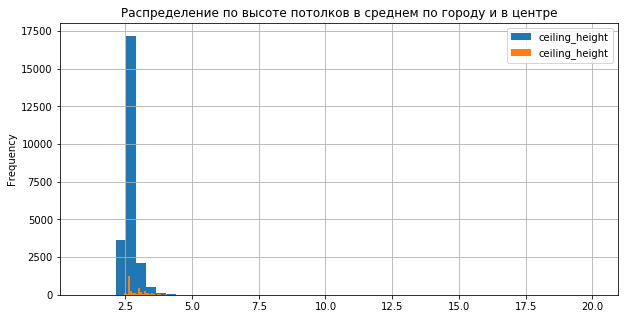

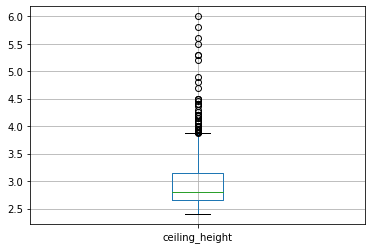

In [12]:
#Исследуем квартиры в центре СПБ

data_spb_center = data_spb.query('cityCenter_km <= 7')

#Общая площать
display(data_spb_center['total_area'].describe())

area_plot = data.plot(kind='hist', y='total_area', bins=50, figsize = (10,5), grid=True)
data_spb_center.plot(ax=area_plot, kind='hist', y='total_area', bins=50, figsize = (10,5), 
                     grid=True, title = 'Распределение по площади в среднем по городу и в центре')
plt.show()

data_spb_center.boxplot(column='total_area')
plt.show()

#Цена
display(data_spb_center['last_price'].describe())

price_plot = data.plot(kind='hist', y='last_price', legend='Last price overall', bins=50, figsize = (10,5), grid=True)
data_spb_center.plot(ax=price_plot, kind='hist', y='last_price', legend='Last price Spb center', bins=50, 
                     figsize = (10,5), grid=True, title = 'Распределение цены в среднем по городу и в центре')
plt.show()

data_spb_center.boxplot(column='last_price')
plt.show()

#Количество комнат
display(data_spb_center['rooms'].describe())

room_plot = data.plot(kind='hist', y='rooms', bins=50, figsize = (10,5), grid=True)
data_spb_center.plot(ax=room_plot, kind='hist', y='rooms', bins=50, 
                     figsize = (10,5), grid=True, title = 'Распределение по кол-ву комнат в среднем по городу и в центре')
plt.show()

data_spb_center.boxplot(column='rooms')
plt.show()

#Высота потолков
display(data_spb_center['ceiling_height'].describe())

ceiling_plot = data.plot(kind='hist', y='ceiling_height', bins=50, figsize = (10,5), grid=True)
data_spb_center.plot(ax=ceiling_plot, kind='hist', y='ceiling_height', bins=50, 
                     figsize = (10,5), grid=True, title = 'Распределение по высоте потолков в среднем по городу и в центре')
plt.show()

data_spb_center.boxplot('ceiling_height')
plt.show()

**Выводы по разбросу параметров квартир в центре Санкт-Петербурга**

В сравнении с выборкой по большому Петербургу, квартиры в центр Спб характеризуются большей средней площадью (медиана 78кв.м. против 52); значительно большей средней ценой (медиана 9.15 млн против 4.6), большим числом комнат (в среднем 3, а однокомнатных предложений крайне мало); и более высокими потолками.

'Корреляция стоимости и площади в центре СПБ:'

0.6405031256911393

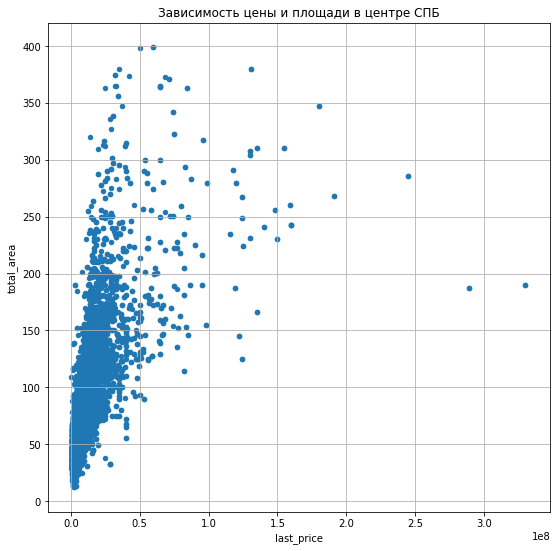

'Корреляция стоимости и кол-ва комнат в центре СПБ:'

0.32748956279222136

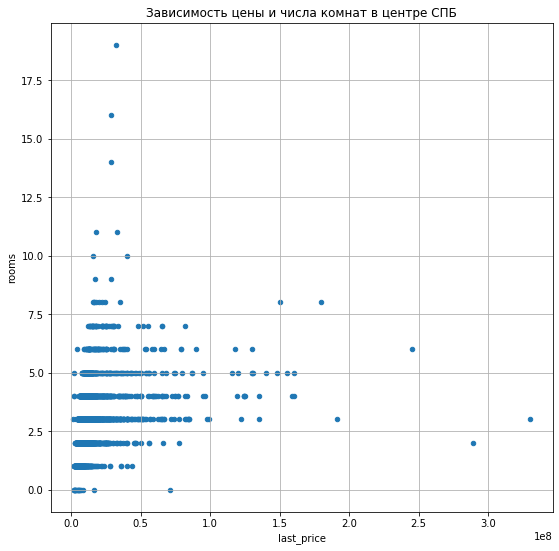

'Корреляция площади и кол-ва комнат в центр СПБ:'

0.7592871895429685

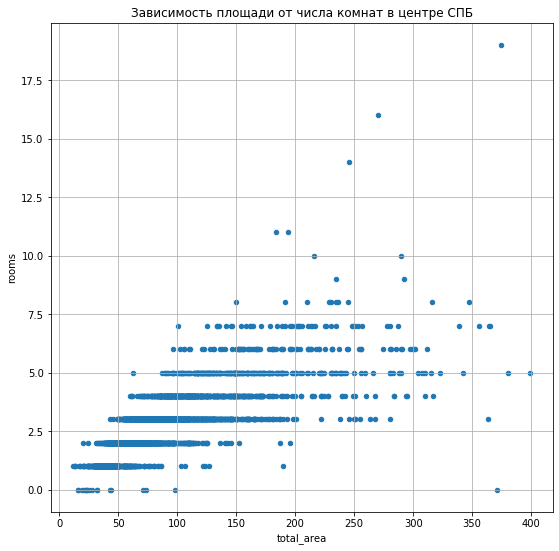

'Корреляция стоимости и расстояния до центра в центре СПБ:'

-0.05505337707491059

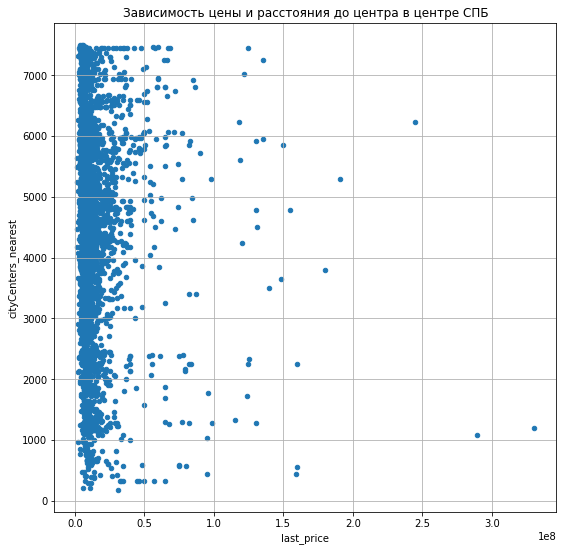

'Корреляция стоимости и дня недели размещения в центре СПБ:'

0.01065966794562598

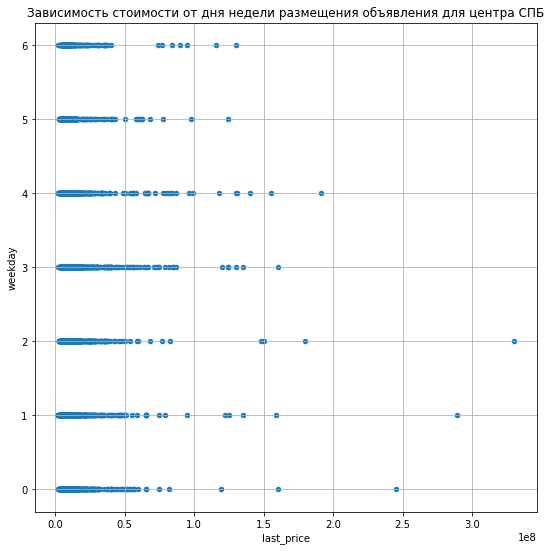

'Корреляция стоимости и месяца размещения в центре СПБ:'

-0.012965803010927228

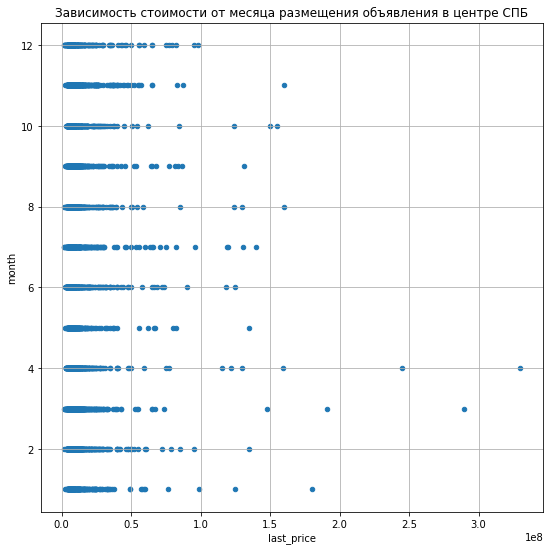

'Корреляция стоимости и года размещения в центре СПБ:'

-0.06052188742357878

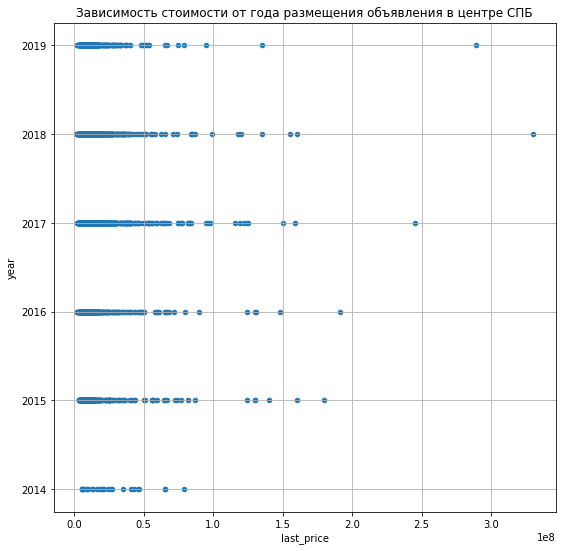

Зависимость стоимости от этажа в центре СПБ:


,last_price
floor_type,
Другой,9600000
Первый,6700000
Последний,9090000


In [13]:
#Посчитаем коэффициенты и построим диаграммы корреляции для центра СПБ

#Зависимость стоимости от площади
display("Корреляция стоимости и площади в центре СПБ:", data_spb_center.last_price.corr(data_spb_center.total_area))
area = data.plot(kind='scatter', x='last_price', y='total_area', grid=True, figsize=(9,9))
data_spb_center.plot(ax=area, kind='scatter', x='last_price', y='total_area', 
                     grid=True, figsize=(9,9), title = 'Зависимость цены и площади в центре СПБ')
plt.show()

#Зависимость стоимости от кол-ва комнат
display("Корреляция стоимости и кол-ва комнат в центре СПБ:", data_spb_center.last_price.corr(data_spb_center.rooms))
data_spb_center.plot(kind='scatter', x='last_price', y='rooms', 
                     grid=True, figsize=(9,9), title = 'Зависимость цены и числа комнат в центре СПБ')
plt.show()

#Зависимость площади от кол-ва комнат
display("Корреляция площади и кол-ва комнат в центр СПБ:", data_spb_center.total_area.corr(data_spb_center.rooms))
data_spb_center.plot(kind='scatter', x='total_area', y='rooms', grid=True, 
                     figsize = (9,9), title = 'Зависимость площади от числа комнат в центре СПБ')
plt.show()

#Зависимость стоимости от расстояния до центра
display("Корреляция стоимости и расстояния до центра в центре СПБ:", data_spb_center.last_price.corr(data_spb_center.cityCenters_nearest))
data_spb_center.plot(kind='scatter', x='last_price', y='cityCenters_nearest', 
                     grid=True, figsize=(9,9), title = 'Зависимость цены и расстояния до центра в центре СПБ')
plt.show()

#Зависимость стоимости от даты размещения
display("Корреляция стоимости и дня недели размещения в центре СПБ:", data_spb_center.last_price.corr(data_spb_center.weekday))
data_spb_center.plot(kind='scatter', x='last_price', y='weekday', 
                     grid=True, figsize=(9,9), title = 'Зависимость стоимости от дня недели размещения объявления для центра СПБ')
plt.show()

display("Корреляция стоимости и месяца размещения в центре СПБ:", data_spb_center.last_price.corr(data_spb_center.month))
data_spb_center.plot(kind='scatter', x='last_price', y='month', 
                     grid=True, figsize=(9,9), title = 'Зависимость стоимости от месяца размещения объявления в центре СПБ')
plt.show()

display("Корреляция стоимости и года размещения в центре СПБ:", data_spb_center.last_price.corr(data_spb_center.year))
data_spb_center.plot(kind='scatter', x='last_price', y='year', grid=True, figsize=(9,9),
                     title = 'Зависимость стоимости от года размещения объявления в центре СПБ')
plt.show()

#Зависимость стоимости от этажа
print('Зависимость стоимости от этажа в центре СПБ:')
display(data_spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='median'))

**Влияние параметров на стоимость квартир в центре Санкт-Петербурга**
В целом для центра Спб характерна та же корреляция стоимости, площади, количества комнат, времени размещения объявления, что и для остальной части города. Разброс цен для равной площади тут чуть больше, чем в среднем по городу. Можно отметить значительно большую непопулярность первых этажей (в центре квартиры на 1м этаже в среднем на 30% дешевле, чем на других этажах), чем в целом по городу, и меньший разрыв стоимость квартир на последнем и других этажах.

## Общий вывод

- Средняя квартира в большом Санкт-Петербурге имеет площать 52кв.м, 2 комнаты, потолки 2.7м и цену в 6.5млн. Для центра Петербурга (окружность с радиусом 10км) эти показатели равны 78кв.м, 3к, 3м и 9.15 млн соответственно.
- Медианная длительность продажи составляет 95дней. Три четверти квартир продаются в течение 230 дней, и лишь четверть удается продать за полтора месяца и меньше. 
- Стоимость квартиры существенно зависит от площади (в среднем коэффициент корреляции равен 0.7). При этом корреляция снижается при увеличении площади: до 100кв.м можно говорить об очень высокой зависимости, далее разброс цен увеличивается.
- Корреляция расстояния до центра и цен в целом слабая. Разброс цен повышается при уменьшении расстояния до центра, резко возрастая в центре СПБ.
- В среднем квартиры на 1х этажах стоят примерно на 10% дешевле чем на последних, а те в свою очередь на столько же дешевле, чем на остальных. В то же время в центре Петербурга квартиры на 1х этажах стоят более чем на 30% дешевле, а вот у последних этажей дисконт совсем небольшой.